In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree,datasets,metrics,model_selection

data = datasets.load_iris()

X = data.data
y = data.target

print(X.shape,y.shape)

(150, 4) (150,)


In [23]:
# split the data into train and test
r=0.4
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,
                            test_size=r,random_state=5)
# create the decision tree model
tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                         max_depth=None)
# train the model
tree_model = tree_model.fit(Xtrain,ytrain)
# predict the train data for training accuracy
ypredTrain = tree_model.predict(Xtrain)
# predict the test data for testing accuracy
ypredTest = tree_model.predict(Xtest)
# caclulate the testing and training accuracy
accTrain = metrics.accuracy_score(ypredTrain,ytrain)
accTest = metrics.accuracy_score(ypredTest,ytest)
# displaythe training and testing accuracy
print("Testing Accuracy:",accTest)
print("Training Accuracy:",accTrain)


Testing Accuracy: 0.95
Training Accuracy: 1.0


In [24]:
 !unzip orl_face.zip

Archive:  orl_face.zip
replace orl_face/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

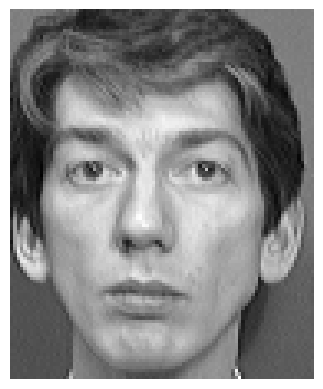

In [25]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

# access any single image
usr_name = 29
samp_no = 6

path = "/content/orl_face/u%d/%d.png"%(usr_name,samp_no)

# read the image
im = mimg.imread(path)

print(type(im))
print(im.shape)

# display the image
plt.imshow(im,cmap='gray')
plt.axis('off')

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# logic to access all the samples of all
# the users
tot_samples = 400
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))
indx=-1
for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1
    # access any single image
    usr_name = i
    samp_no = j
    path = "/content/orl_face/u%d/%d.png"%(usr_name,samp_no)

    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    print("user num ",i,'samp no',j,'processed...')

user num  1 samp no 1 processed...
user num  1 samp no 2 processed...
user num  1 samp no 3 processed...
user num  1 samp no 4 processed...
user num  1 samp no 5 processed...
user num  1 samp no 6 processed...
user num  1 samp no 7 processed...
user num  1 samp no 8 processed...
user num  1 samp no 9 processed...
user num  1 samp no 10 processed...
user num  2 samp no 1 processed...
user num  2 samp no 2 processed...
user num  2 samp no 3 processed...
user num  2 samp no 4 processed...
user num  2 samp no 5 processed...
user num  2 samp no 6 processed...
user num  2 samp no 7 processed...
user num  2 samp no 8 processed...
user num  2 samp no 9 processed...
user num  2 samp no 10 processed...
user num  3 samp no 1 processed...
user num  3 samp no 2 processed...
user num  3 samp no 3 processed...
user num  3 samp no 4 processed...
user num  3 samp no 5 processed...
user num  3 samp no 6 processed...
user num  3 samp no 7 processed...
user num  3 samp no 8 processed...
user num  3 samp n

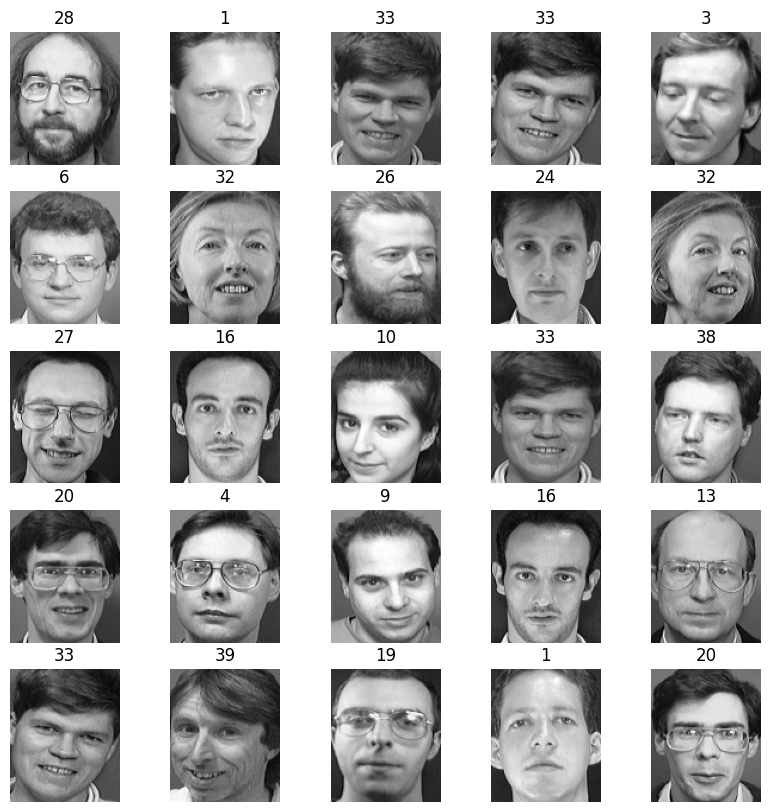

In [27]:
ind=0
for i in range(5):
  for j in range(5):
    ind = ind+1
    s = np.random.randint(0,400)
    currIm = images[s,:,:]
    currId = label[s]
    plt.figure(1,(10,10))
    plt.subplot(5,5,ind)
    plt.imshow(currIm,cmap='gray')
    plt.title(str(int(currId)))
    plt.axis('off')



In [28]:
from sklearn import svm,model_selection,metrics
import pandas as pd
X = data.copy()
y = label.copy()


# split the data into 70:30 ratio
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

ker = ['poly','linear','rbf']
c_value = [1,2,3]

# pre allocation of the result variable
result = np.zeros((len(ker),len(c_value)))
for i in range(len(ker)):
  for j in range(len(c_value)):
    # create the svm classifier
    orl_svm_model = svm.SVC(kernel=ker[i],gamma='scale',C=c_value[j])

    # train the model
    orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

    # predict the labels
    ypred = orl_svm_model.predict(Xtest)

    # accuracy
    acc = metrics.accuracy_score(ypred,ytest)
    #print("accuracy:", acc)
    result[i,j]=acc
print(result)

ResultDF = pd.DataFrame(result,index=ker,columns=["C=1","C=2","C=3"])
ResultDF

(280, 10304) (280,)
(120, 10304) (120,)
[[0.94166667 0.94166667 0.94166667]
 [0.95       0.95       0.95      ]
 [0.88333333 0.95       0.95      ]]


,C=1,C=2,C=3
poly,0.941667,0.941667,0.941667
linear,0.950000,0.950000,0.950000
rbf,0.883333,0.950000,0.950000


0.21176471


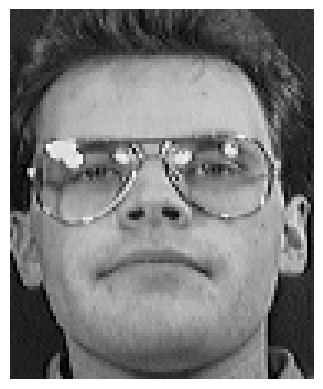

In [29]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
path = '/content/orl_face/u36/10.png'
im = mimg.imread(path)
print(im[0,10])
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [30]:
import numpy as np
data = np.zeros((400,112,92))
label = np.zeros(400)
print(data.shape)
count = 0
for i in range(1,39):
  for j in range(1,11):
    path = '/content/orl_face/u%d/%d.png'%(i,j)
    im = mimg.imread(path)
    data[count,:,:] = im
    label[count] = i
    count+=1

print(data.shape,label.shape)

(400, 112, 92)
(400, 112, 92) (400,)


In [31]:
from sklearn import model_selection
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(data,label,test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

face_model = keras.Sequential()
#input layer
face_model.add(keras.layers.Flatten(input_shape=(xtrain.shape[1],xtrain.shape[2])))

#hidden layers
face_model.add(keras.layers.Dense(128,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(256,activation='relu'))
face_model.add(keras.layers.Dense(512,activation='relu'))

#output layer
face_model.add(keras.layers.Dense(410,activation='relu'))

#add optimizer
face_model.compile(optimizer="SGD", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

print(face_model.summary())

(280, 112, 92) (280,)
(120, 112, 92) (120,)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 10304)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               1319040   
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 410)               210330    
                                                                 
Total para

In [32]:
#train the model
history = face_model.fit(xtrain, ytrain, epochs=150)

Epoch 1/150
9/9 [==============================] - 1s 4ms/step - loss: 6.0081 - accuracy: 0.0393
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 5.9459 - accuracy: 0.0964
Epoch 3/150
9/9 [==============================] - 0s 5ms/step - loss: 5.8204 - accuracy: 0.0964
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 5.5443 - accuracy: 0.0929
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 5.1116 - accuracy: 0.1036
Epoch 6/150
9/9 [==============================] - 0s 4ms/step - loss: 4.8771 - accuracy: 0.1036
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: 4.8147 - accuracy: 0.0929
Epoch 8/150
9/9 [==============================] - 0s 4ms/step - loss: 4.8026 - accuracy: 0.0786
Epoch 9/150
9/9 [==============================] - 0s 4ms/step - loss: 4.7372 - accuracy: 0.1000
Epoch 10/150
9/9 [==============================] - 0s 4ms/step - loss: 4.7431 - accuracy: 0.1000
Epoch 11/150
9/9 [===========

In [33]:
#evaluate the test data

[loss, accNN] = face_model.evaluate(xtest, ytest)
print(f"Testing Accuracy of Neural Network (NN) is: {accNN}")

4/4 [==============================] - 0s 6ms/step - loss: 0.5164 - accuracy: 0.8917
Testing Accuracy of Neural Network (NN) is: 0.8916666507720947


In [34]:
# create the CNN model
cnn_model = keras.models.Sequential() # empty framework
# Convolutinal layer 1
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu',input_shape=(112,92,1)))
# maxpooling -1
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# Convolutinal layer 2
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
cnn_model.add(keras.layers.Conv2D(64,3,activation='relu'))
# maxpooling -2
cnn_model.add(keras.layers.MaxPool2D((2,2)))

# feed forwards network
cnn_model.add(keras.layers.Flatten()) # input layer
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL1
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL2
cnn_model.add(keras.layers.Dense(200,activation='relu')) # HL3
cnn_model.add(keras.layers.Dense(410)) # Output layer

# optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer='sgd',loss = loss,metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 110, 90, 64)       640       
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 88, 64)       36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 106, 86, 64)       36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 53, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 51, 41, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 49, 39, 64)        36928     
                                                      

In [38]:
# train the cnn along with the validation data
history = cnn_model.fit(xtrain,ytrain,epochs=220,validation_data=(xtest,ytest))

Epoch 1/220
9/9 [==============================] - 1s 107ms/step - loss: 3.5271 - accuracy: 0.0679 - val_loss: 3.5591 - val_accuracy: 0.0500
Epoch 2/220
9/9 [==============================] - 1s 84ms/step - loss: 3.4763 - accuracy: 0.0893 - val_loss: 3.7508 - val_accuracy: 0.0500
Epoch 3/220
9/9 [==============================] - 1s 79ms/step - loss: 3.4915 - accuracy: 0.0786 - val_loss: 3.3855 - val_accuracy: 0.0417
Epoch 4/220
9/9 [==============================] - 1s 76ms/step - loss: 3.3079 - accuracy: 0.1321 - val_loss: 3.4027 - val_accuracy: 0.0667
Epoch 5/220
9/9 [==============================] - 1s 93ms/step - loss: 3.3211 - accuracy: 0.1179 - val_loss: 3.3757 - val_accuracy: 0.0583
Epoch 6/220
9/9 [==============================] - 1s 73ms/step - loss: 3.1292 - accuracy: 0.1321 - val_loss: 3.5231 - val_accuracy: 0.0833
Epoch 7/220
9/9 [==============================] - 1s 65ms/step - loss: 3.2731 - accuracy: 0.1000 - val_loss: 3.2346 - val_accuracy: 0.0500
Epoch 8/220
9/9 [==

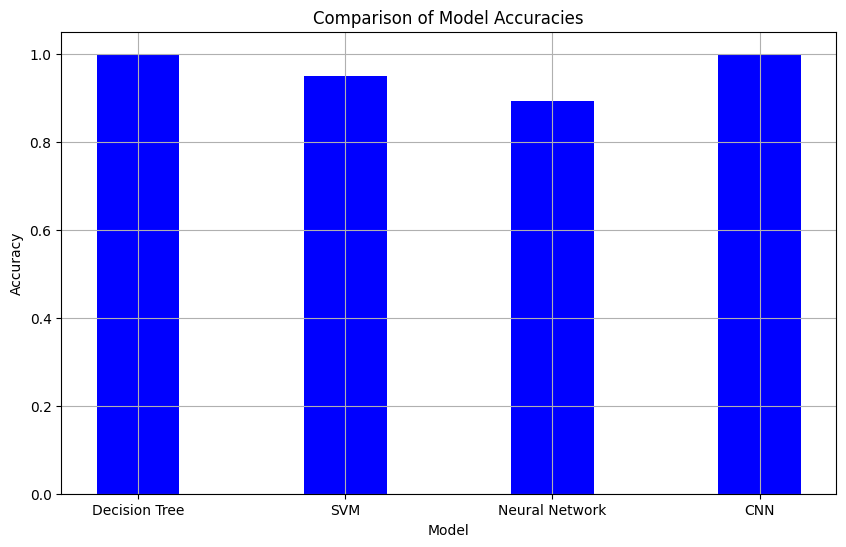

In [39]:

import matplotlib.pyplot as plt

# Create the data
x = ['Decision Tree', 'SVM', 'Neural Network', 'CNN']
y = [accTrain, accTest, accNN, history.history['accuracy'][-1]]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue', width=0.4)

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")

# Add grid and show plot
plt.grid(True)
plt.show()
